# Maching Learning
## Project - Investigate a Dataset
## 泰坦尼克号数据

### 前言
>泰坦尼克號是1912最大的客船，但在處女航的過程中撞上冰山後隨即沉沒，導致大部分的乘客死亡。此次災難還拍成了電影，可謂世界聞名。
>
>在電影中，也出現了婦孺優先登上救生船，以及船長、船員殿後的情節。
>
>以下將就本次取得的數據來進行分析，觀察什麼樣的情況之下，乘客會有較高的存活率。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
df = pd.read_csv('titanic-data.csv')

# 1.數據觀察及清理

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


可看到數據檔案內包含了以下變量 : 
$
Survived : 存活與否 ( 0 = 死亡, 1 = 存活 ) \\
Pclass   : 艙等 (1 = 1st, 2 = 2nd, 3 = 3rd ) \\
Name     : 姓名 \\
Sex      : 性別 \\
Age      : 年齡 \\
SibSp    : 在船上的兄弟姊妹/配偶數量 \\
Parch    : 在船上的父母/子女數量 \\
Ticket   : 船票號碼 \\
Fare     : 船票價格 \\
Cabin    : 船艙號碼 \\
Embarked : 登船港口 \\
$

姓名、船票號碼以及船艙號碼，或許可以分辨此人的身分地位以及所在的船艙等級，但在此資料內已有紀錄艙等，故在後續的分析內暫不使用。

In [3]:
# drop unnecessary columns, these columns won't be use in analysis
df = df.drop(['Name','Ticket','Cabin'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [4]:
len(df)

891

此數據集總計有891組數據，首先查找各數據的缺失情況。

In [5]:
def checkNaN(name):
    '''Check if there is any NaN'''
    return df[name].isnull().sum()

for name in df:
    print name,' : ',checkNaN(name)

PassengerId  :  0
Survived  :  0
Pclass  :  0
Sex  :  0
Age  :  177
SibSp  :  0
Parch  :  0
Fare  :  0
Embarked  :  2


可以看出年齡以及船艙號碼的缺失狀況最嚴重，分別有177以及687組數據缺失，另外登船港口也有2組缺失數據。年齡與存活狀況可能有關連，而登船港口的數據缺失十分少量，因此選擇補充此部分之缺失數據。

In [6]:
df['Embarked'] = df['Embarked'].fillna('S') #fill NaN of Embarked by 'S'
df['Age'] = df['Age'].fillna(df['Age'].median()) #fill NaN of Age by median of Age

In [7]:
#由於性別為字串，增加一列並改變為數字，方便後續處理可計算性別的比例。
def change_sex_to_num(sex):
    if sex == 'female':
        return 0
    elif sex == 'male':
        return 1

df['Sex_num'] = df['Sex'].apply(change_sex_to_num)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_num
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,0
2,3,1,3,female,26.0,0,0,7.9250,S,0
3,4,1,1,female,35.0,1,0,53.1000,S,0
4,5,0,3,male,35.0,0,0,8.0500,S,1


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_num
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.647587
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


# 2. 初步探索數據
### 2.0 計算各變量及存活率之間的相關係數

In [10]:
pearson = df.corr()
print pearson[['Survived','Pclass','Age','SibSp','Sex_num']]

             Survived    Pclass       Age     SibSp   Sex_num
PassengerId -0.005007 -0.035144  0.034212 -0.057527  0.042939
Survived     1.000000 -0.338481 -0.064910 -0.035322 -0.543351
Pclass      -0.338481  1.000000 -0.339898  0.083081  0.131900
Age         -0.064910 -0.339898  1.000000 -0.233296  0.081163
SibSp       -0.035322  0.083081 -0.233296  1.000000 -0.114631
Parch        0.081629  0.018443 -0.172482  0.414838 -0.245489
Fare         0.257307 -0.549500  0.096688  0.159651 -0.182333
Sex_num     -0.543351  0.131900  0.081163 -0.114631  1.000000


可見與存活率相關度最高的前三個變數分別是 <br/>
1. 性別
2. 倉等
3. 年齡<br/>
因此接下來將主要針對此三點進行分析。

### 2.1 將單一變量製圖觀察是否有明顯趨勢
在此數據集中，主要想針對泰坦尼克號事件，乘客存活與否和各個因素的關聯性進行探討。

In [11]:
#設置函數供後續使用
from scipy.stats import ttest_ind
def count_size(name):
    '''count number of group'''
    return df.groupby(name).size()

def survival_rate_by_group(name):
    '''count survival rate by grouped data'''
    return df.groupby(name)['Survived'].mean()

def mean_by_group(group_by,name):
    '''calculate mean of some values by group'''
    return df.groupby(group_by)[name].mean()

def count_by_group(group_by,name):
    '''calculate number of some values by group'''
    return df.groupby(group_by)[name].count()

def make_pie(group_by):
    '''make pie chart'''
    return group_by.plot.pie(figsize=(6,6),autopct='%.2f%%')
    #return df.groupby(group_by).size().plot.pie(figsize=(6,6),autopct='%.2f%%',title = group_by)

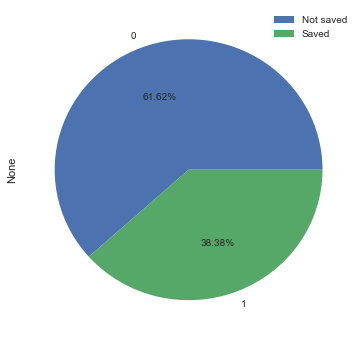

In [12]:
#計算整體存活率
df['Survived'].mean()
make_pie(count_size('Survived'))
plt.legend(labels=['Not saved','Saved'])

>首先想到的是「女士優先」的俗語，因此性別是否會對存活率有區別是一個可探討的點。
>
>故分別計算兩個性別的存活率。

In [13]:
survival_rate_by_group('Sex')

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

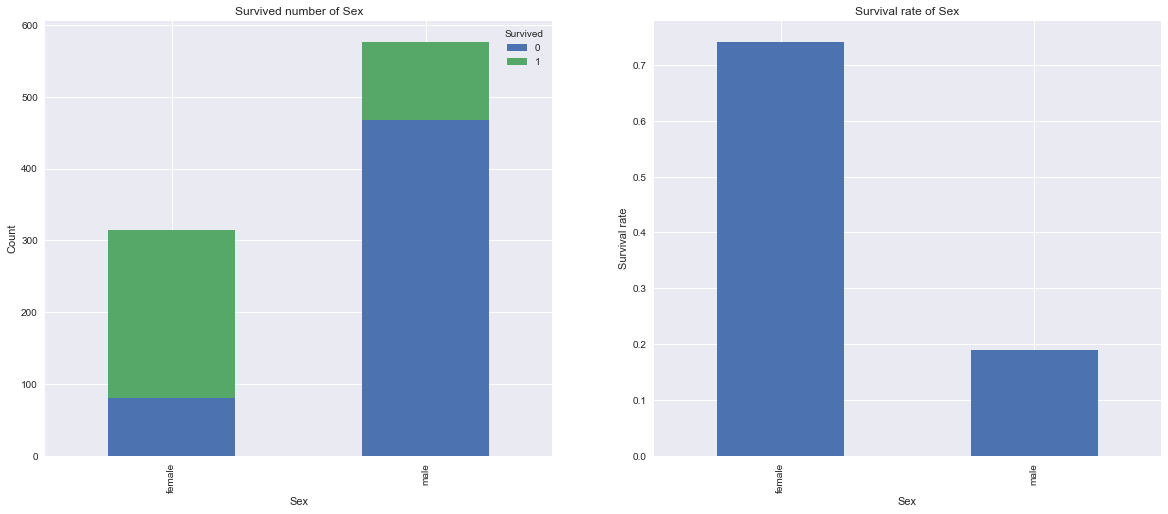

In [14]:
#calculate survival rate by Pclass
plt.figure(figsize = (12, 5))
f,(ax1,ax2) = plt.subplots(1, 2)
f.set_size_inches((20, 8))
count_by_group(['Sex','Survived'],'PassengerId').unstack().plot(kind='bar',
                                                                ax = ax1, 
                                                                stacked = True
                                                              )
ax1.set_title('Survived number of Sex')
ax1.set_ylabel('Count')

survival_rate_by_group('Sex').plot(kind = 'bar', ax = ax2)
ax2.set_title('Survival rate of Sex')
ax2.set_ylabel('Survival rate')

plt.show()

可看見雖然男性登船人數較多，但死亡人數也較多，女性的生存率有74.2%，男性只有18.9%，女性存活率遠大於男性。

>再來我們已知艙等與客艙位在船上的位置是有關連的(1st class的樓層最高，3rd的樓層最低)。
>
>預想頭等艙票價較貴，因此乘客可能身份地位較高，且可以想到樓層越高要逃離船難也應該更為簡單，因此想針對客艙艙等與存活率進行觀察。

Survival rate by Pclass
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


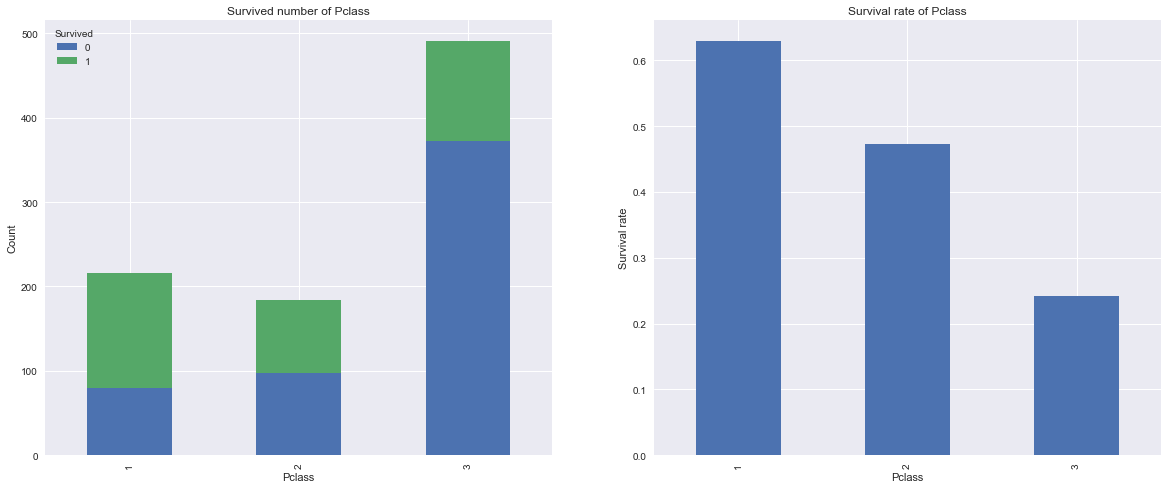

In [15]:
print 'Survival rate by Pclass'
print survival_rate_by_group('Pclass')

#calculate survival rate by Pclass
plt.figure(figsize = (12, 5))
f,(ax1,ax2) = plt.subplots(1, 2)
f.set_size_inches((20, 8))
count_by_group(['Pclass','Survived'],'PassengerId').unstack().plot(kind='bar',
                                                                ax = ax1, 
                                                                stacked = True
                                                              )
ax1.set_title('Survived number of Pclass')
ax1.set_ylabel('Count')

survival_rate_by_group('Pclass').plot(kind = 'bar', ax = ax2)
ax2.set_title('Survival rate of Pclass')
ax2.set_ylabel('Survival rate')

plt.show()

可以看到3rd class的人數最多, 但死亡的人也最多，存活率僅有24.2%。整體的存活比率為1st class > 2nd class > 3rd class。

>再來計算乘客的年齡是否會因為影響活動能力而對存活率有所影響。
>
>

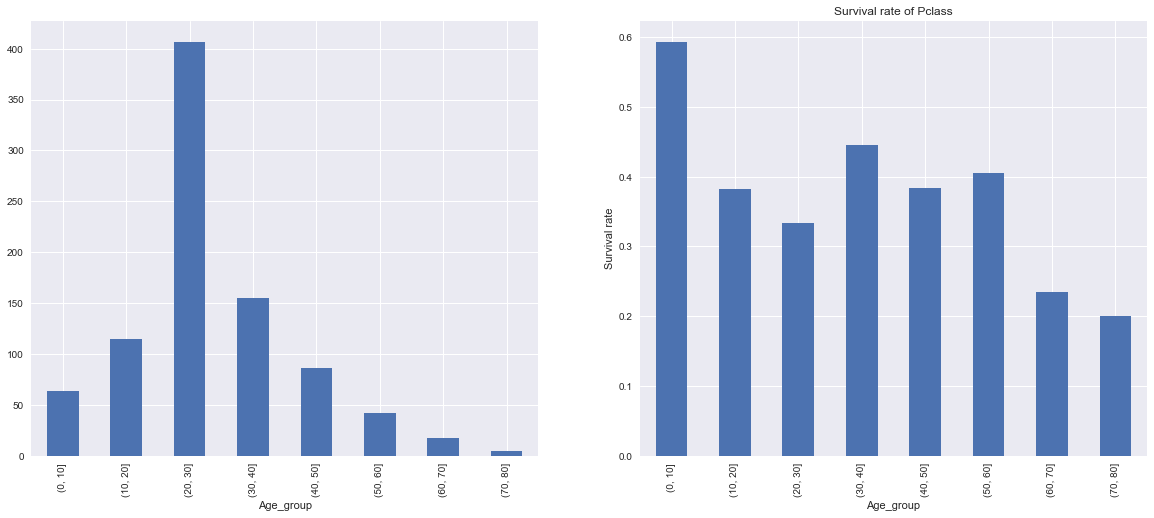

In [16]:
plt.figure(figsize = (12, 5))
f,(ax1,ax2) = plt.subplots(1, 2)
f.set_size_inches((20, 8))

#calculate survived number by Age
bins = np.arange(0 ,90, 10)
df['Age_group'] = pd.cut(df['Age'], bins)
count_by_group('Age_group','PassengerId').plot(kind = 'bar',ax = ax1)
plt.title('Survived number of Age')
plt.ylabel('Count')

#calculate survival rate by Age
survival_rate_by_group('Age_group').plot(kind = 'bar', ax = ax2)
ax2.set_title('Survival rate of Pclass')
ax2.set_ylabel('Survival rate')

plt.show()

初步觀察可見20-30歲之間的存活人數最多，但年齡與存活率沒有可見到明確的差異，只可觀察到10歲以下的幼童存活率較高。

## 2.2 進行多變量的製圖分析
接下來想針對前項有相當大差距的性別以及倉等進行分析，觀察他們之間的關聯性。

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


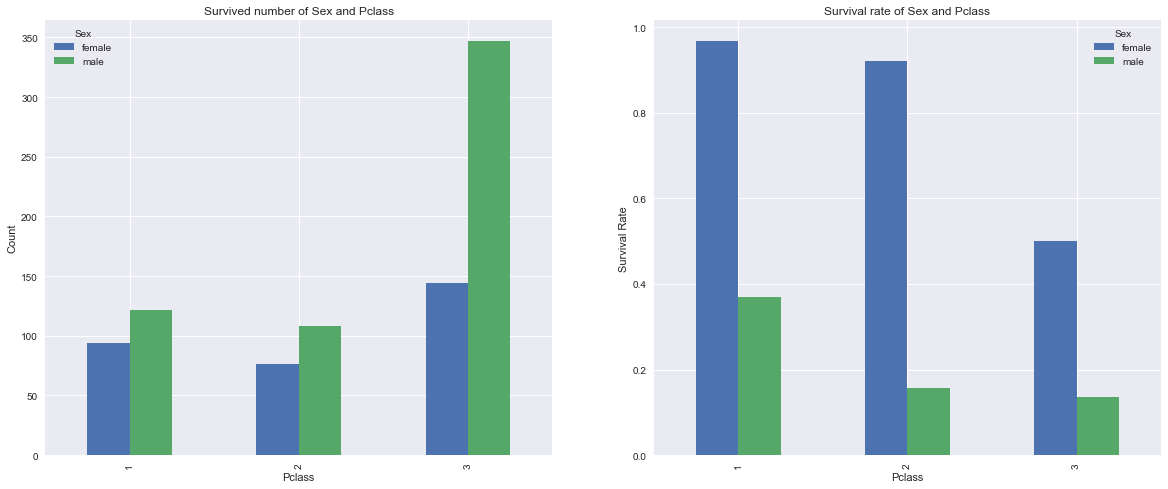

In [17]:
print mean_by_group(['Sex','Pclass'],'Survived')

#set figer
plt.figure(figsize = (14, 5))
f,(ax1,ax2) = plt.subplots(1, 2)
f.set_size_inches((20, 8))

#calculate survived number of Sex and Pclass
count_by_group(['Pclass','Sex'],'PassengerId').unstack().plot(kind = 'bar',ax = ax1)
ax1.set_title('Survived number of Sex and Pclass')
ax1.set_ylabel('Count')

#calculate survival rate of Sex and Pclass
survival_rate_by_group(['Pclass','Sex']).unstack().plot(kind = 'bar', ax = ax2)
ax2.set_title('Survival rate of Sex and Pclass')
ax2.set_ylabel('Survival Rate')

plt.show()

可見如果是1st及2nd倉等中的女性佔了生存者中的絕大多數，其倖存率均超過90%，其次為3rd倉等的女性，但其倖存率已大幅降低到僅有50%。男性則存活率大幅降低，2nd及3rd倉等的男性分別只有15.7%及13.5%的存活率。 <br\>
而不管是男是女，其存活率都隨著艙等越高而有增加的趨勢。

# 結論
>綜合以上分析，對生存率影響較大的變量有性別,倉等和年齡。但年齡部分由於數據缺失較嚴重，僅以中位數進行數據填充，是否有明確影響尚待進一步挖掘。
>
>而性別則對存活率有一定的影響力，男性的存活率僅有18%，而女性則到達74%的存活率。
>
>船艙等級與存活率相掛鉤的因素，可以想到的是由於船艙的位置可能會影響到逃生的難易度，位於最底層的三等艙只有24%的乘客存活。
>
>另外船艙等級是否與地位的高低有關連，會不會有地位較高的人可以優先登上救生船的情況，則可能需在找尋其他資訊再進行判斷。其他可以想像到會影響的因素還有，此人是否是船員，會因職責問題而必須最後離開,是否有受傷等情況，均有可能會影響乘客是否存活。
>
### 本次分析的不確定因素
>
>查詢歷史資料可知，泰坦尼克號上總計有1324乘客和892名甲板工作人員上船，而本次使用的數據僅有891筆數據資料。並不能代表著整體泰坦尼克號上的總體數據，樣本與整體可能會存在著偏差。
>
>同時數據集中也還沒有經過統計分析，所以還無法說本次統計結果是真正的具有相關性。
>